In [1]:
import os
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
plt.rc("figure", dpi=100)
SMALL_SIZE = 10
BIGGER_SIZE = 11
plt.rc('font', size=BIGGER_SIZE)
plt.rc('axes', titlesize=BIGGER_SIZE)
plt.rc('axes', labelsize=BIGGER_SIZE)
plt.rc('axes', linewidth=.5)
plt.rc('xtick', labelsize=BIGGER_SIZE)
plt.rc('ytick', labelsize=BIGGER_SIZE)
plt.rc('legend', fontsize=SMALL_SIZE)
plt.rc('figure', titlesize=1)
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.minor.size'] = 5

In [8]:
data_path = Path("agnosticity_results/")
os.listdir(data_path)

['.DS_Store', 'win_25', 'win_100', 'win_50', 'win_150']

In [9]:
datasets = ["SMAP", "MSL"]
detectors = ["Influence Function", "RNN", "LSTM", "GradientBoosting"]
metrics = ["AUC", "Elapsed Time(s)"]

In [26]:
grouped_df

Detector,GradientBoosting,Influence Function,LSTM,RNN
Window_Size,,,,
25,108.710333,0.229800,99.171300,37.915625
50,212.664963,0.221950,199.558063,74.863037
100,NaN,0.306575,554.526788,316.830287
150,NaN,0.452755,513.711111,166.753889


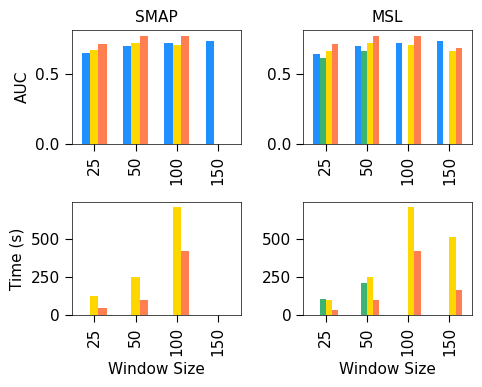

In [52]:
colors = ['dodgerblue', "mediumseagreen", 'gold', 'coral']

fig, axes = plt.subplots(2, 2, figsize=(5,4))
for i, metric in enumerate(metrics):
    dataframes = []
    for j, dataset in enumerate(["SMAP", "MSL"]):
        for win_size in [25,50,100,150]:
            path = data_path/f"win_{win_size}"
            for filename in os.listdir(path):
                if filename.split("_")[1] == "InfluenceFunctionDetector":
                    try:
                        detector_name = "Influence Function"
                        df = pd.read_csv(path/f'{dataset}_InfluenceFunctionDetector_results.csv')
                        df['Window_Size'] = win_size
                        df['Detector'] = detector_name
                        dataframes.append(df)
                    except:
                        pass
                elif filename.split("_")[1] == "NonparametricInfluenceFunctionDetector":
                    try:
                        detector_name = filename.split("_")[2]
                        df = pd.read_csv(path/f'{dataset}_NonparametricInfluenceFunctionDetector_{detector_name}_results.csv')
                        df['Window_Size'] = win_size
                        df['Detector'] = detector_name
                        dataframes.append(df)
                    except:
                        pass
                else:
                    try:
                        detector_name = filename.split("_")[2]
                        df = pd.read_csv(path/f'{dataset}_BlackBoxInfluenceFunctionDetector_{detector_name}_results.csv')
                        df['Window_Size'] = win_size
                        df['Detector'] = detector_name
                        dataframes.append(df)
                    except:
                        pass
            combined_df = pd.concat(dataframes)
            grouped_df = combined_df.groupby(['Window_Size', 'Detector'])[metric].mean().unstack()
            if 'GradientBoosting' in grouped_df.columns:
                grouped_df.columns = ["Gradient Boosting", "Influence Function", "LSTM", "RNN"]
                grouped_df = grouped_df.reindex(columns=["Influence Function", "Gradient Boosting", "LSTM", "RNN"])
                colors = ['dodgerblue', "mediumseagreen", 'gold', 'coral']
            else:
                grouped_df.columns = ["Influence Function", "LSTM", "RNN"]
                grouped_df = grouped_df.reindex(columns=["Influence Function", "LSTM", "RNN"]) 
                colors = ['dodgerblue', 'gold', 'coral']
            grouped_df.plot(kind='bar', ax=axes[i,j], color=colors, width=0.6)
            axes[0,j].set_xlabel("")
            axes[1,j].set_xlabel("Window Size")
            axes[0,0].set_ylabel("AUC")
            axes[1,0].set_ylabel("Time (s)")
            axes[i,j].legend("", frameon=False)
            axes[0,j].set_title(dataset)
plt.tight_layout()
plt.savefig("./plots/model_agnosticity.png", dpi=300)

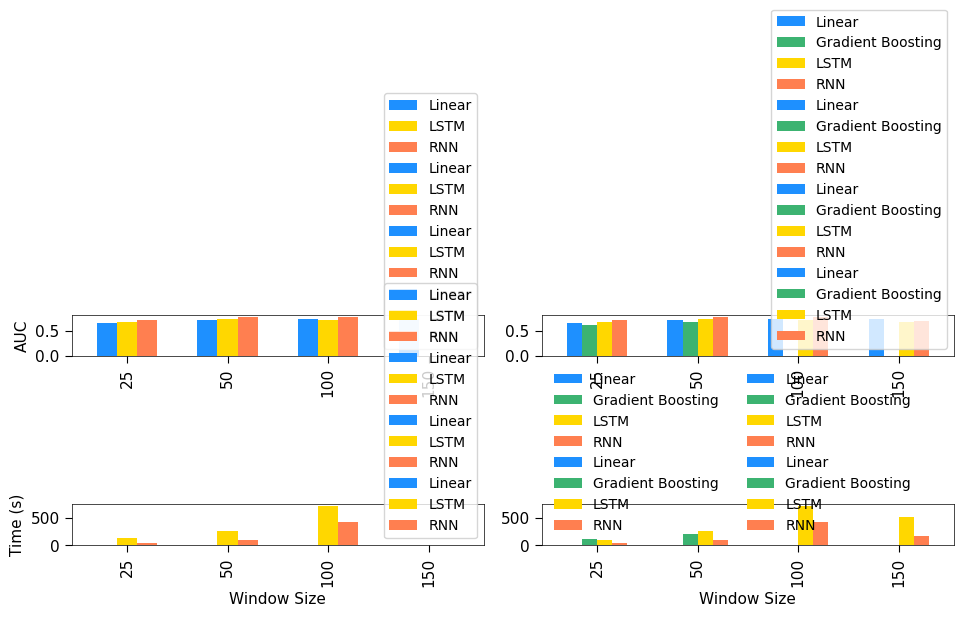

In [55]:
colors = ['dodgerblue', "mediumseagreen", 'gold', 'coral']

fig, axes = plt.subplots(2, 2, figsize=(10,5))
for i, metric in enumerate(metrics):
    dataframes = []
    for j, dataset in enumerate(["SMAP", "MSL"]):
        for win_size in [25,50,100,150]:
            path = data_path/f"win_{win_size}"
            for filename in os.listdir(path):
                if filename.split("_")[1] == "InfluenceFunctionDetector":
                    try:
                        detector_name = "Influence Function"
                        df = pd.read_csv(path/f'{dataset}_InfluenceFunctionDetector_results.csv')
                        df['Window_Size'] = win_size
                        df['Detector'] = detector_name
                        dataframes.append(df)
                    except:
                        pass
                elif filename.split("_")[1] == "NonparametricInfluenceFunctionDetector":
                    try:
                        detector_name = filename.split("_")[2]
                        df = pd.read_csv(path/f'{dataset}_NonparametricInfluenceFunctionDetector_{detector_name}_results.csv')
                        df['Window_Size'] = win_size
                        df['Detector'] = detector_name
                        dataframes.append(df)
                    except:
                        pass
                else:
                    try:
                        detector_name = filename.split("_")[2]
                        df = pd.read_csv(path/f'{dataset}_BlackBoxInfluenceFunctionDetector_{detector_name}_results.csv')
                        df['Window_Size'] = win_size
                        df['Detector'] = detector_name
                        dataframes.append(df)
                    except:
                        pass
            combined_df = pd.concat(dataframes)
            grouped_df = combined_df.groupby(['Window_Size', 'Detector'])[metric].mean().unstack()
            if 'GradientBoosting' in grouped_df.columns:
                grouped_df.columns = ["Gradient Boosting", "Linear", "LSTM", "RNN"]
                grouped_df = grouped_df.reindex(columns=["Linear", "Gradient Boosting", "LSTM", "RNN"])
                colors = ['dodgerblue', "mediumseagreen", 'gold', 'coral']
            else:
                grouped_df.columns = ["Linear", "LSTM", "RNN"]
                grouped_df = grouped_df.reindex(columns=["Linear", "LSTM", "RNN"]) 
                colors = ['dodgerblue', 'gold', 'coral']
            grouped_df.plot(kind='bar', ax=axes[i,j], color=colors, width=0.6)
#             axes[i,j].set_xticklabels(detectors, rotation=360)
            axes[0,j].set_xlabel("")
            axes[1,j].set_xlabel("Window Size")
            axes[0,0].set_ylabel("AUC")
            axes[1,0].set_ylabel("Time (s)")
axes[-1,-1].legend(ncol=2, frameon=False)
plt.tight_layout()
plt.savefig("./plots/model_agnosticity_legend.png", dpi=300)